# CS699 Classification Project
## Author: Mike Zhong
## Teammate: Jan Alleman

### Explore the data, distributions, and clean it up for WEKA consumption

In [422]:
# python3
import pandas as pd

In [423]:
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [424]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [425]:
_df = pd.read_csv('data/redfin_2020-02-10-15-33-53.csv')
_df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,650 Columbia Rd #1,Boston,MA,2125,445000,3.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/MA/Boston/650-Columbia-R...,MLS PIN,72616901,N,Y,42.318819,-71.063719
1,MLS Listing,NaN,Condo/Co-op,125 Hart St Unit 3B,Taunton,MA,2780,329900,3.0,1.5,...,Active,NaN,NaN,http://www.redfin.com/MA/Taunton/125-Hart-St-0...,MLS PIN,72616541,N,Y,41.884280,-71.068718
2,MLS Listing,NaN,Single Family Residential,5 Federal St,Wilmington,MA,1887,599900,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/MA/Wilmington/5-Federal-...,MLS PIN,72616409,N,Y,42.561642,-71.158150
3,MLS Listing,NaN,Single Family Residential,10 Greenhouse Way,Randolph,MA,2368,589000,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/MA/Randolph/10-Green-Hou...,MLS PIN,72616330,N,Y,42.169828,-71.067535
4,MLS Listing,NaN,Single Family Residential,22 Temple St,Reading,MA,1867,759900,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/MA/Reading/22-Temple-St-...,MLS PIN,72616298,N,Y,42.522059,-71.113402


In [426]:
_df.shape

(350, 27)

In [427]:
# drop NAN cols (SOLD DATE)
df = _df.dropna(axis=1, how='all')
df.shape

(350, 26)

### Look at the value counts distribution of the columns

C:\Users\mzhong\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


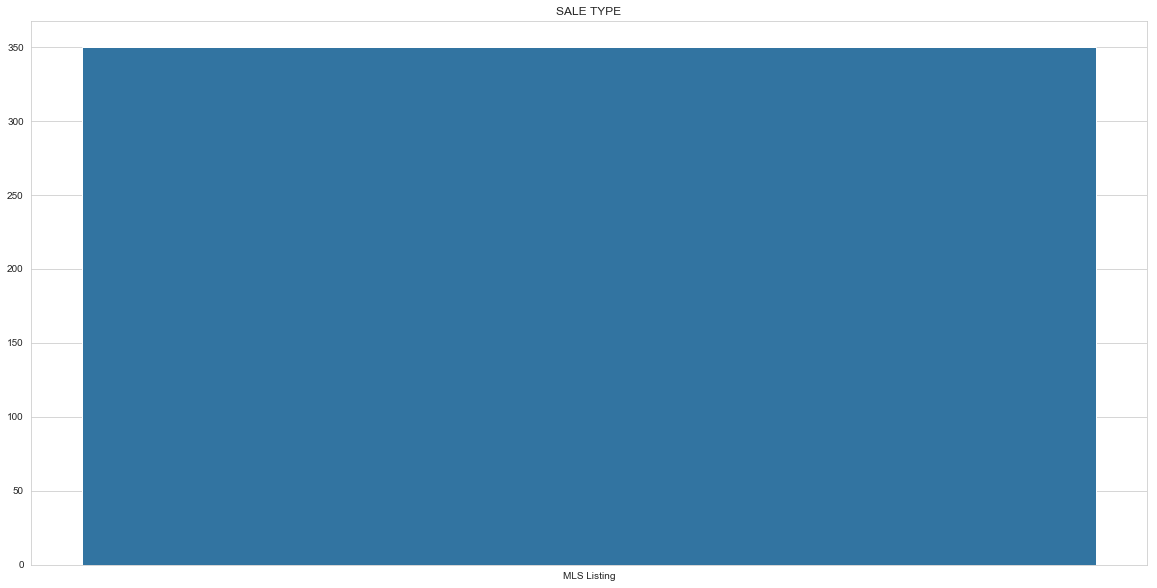

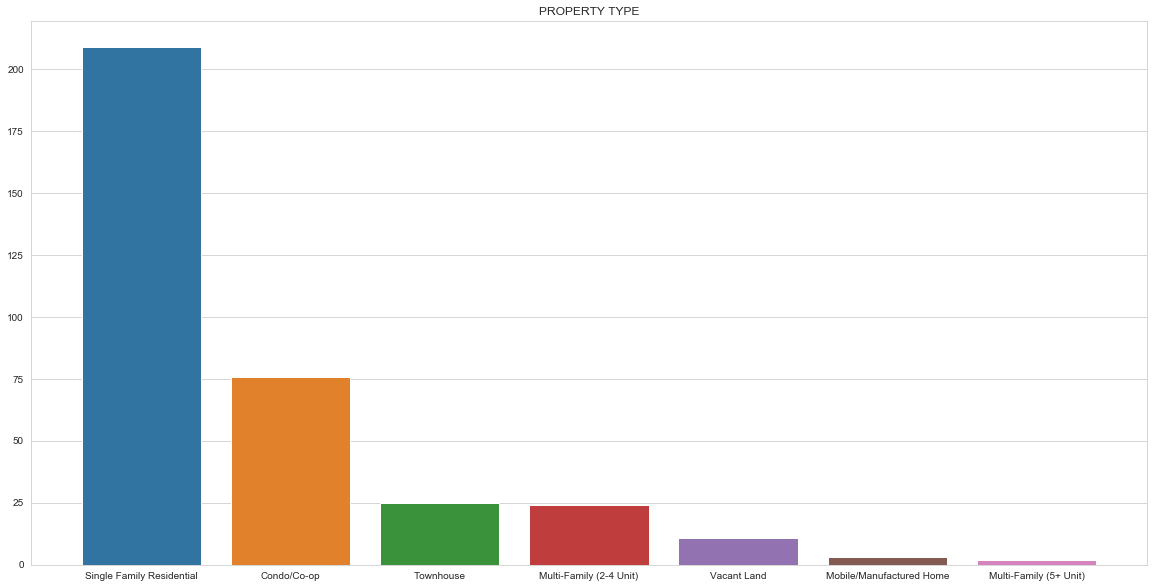

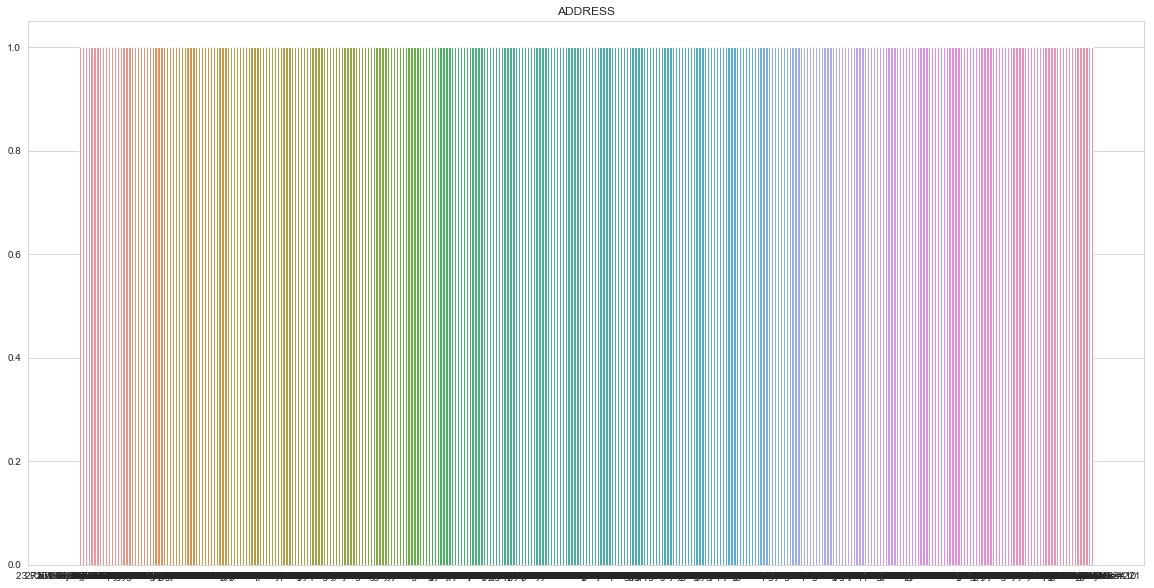

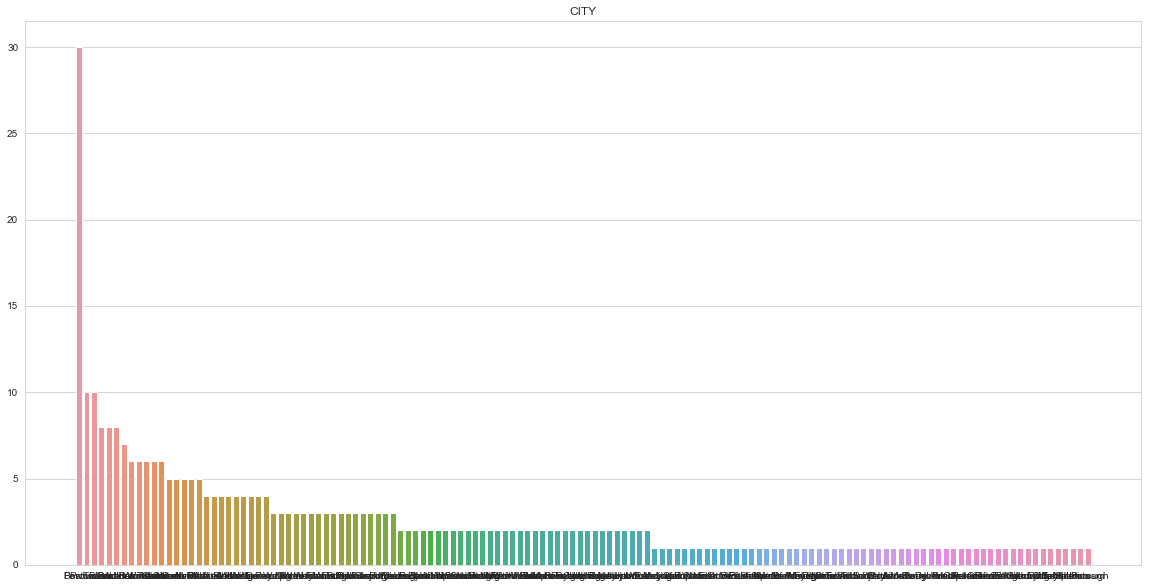

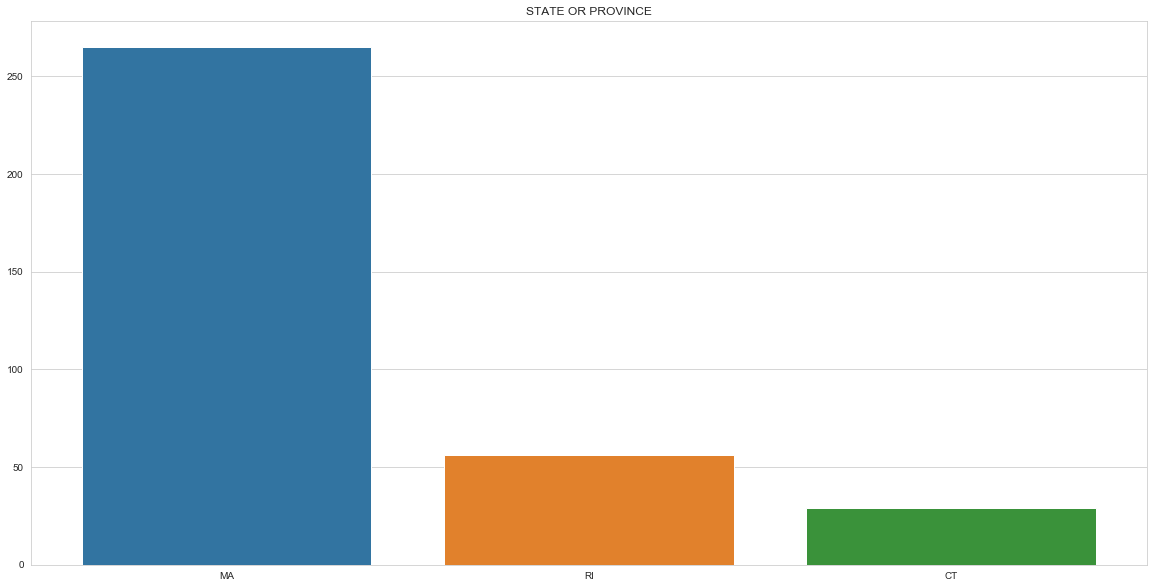

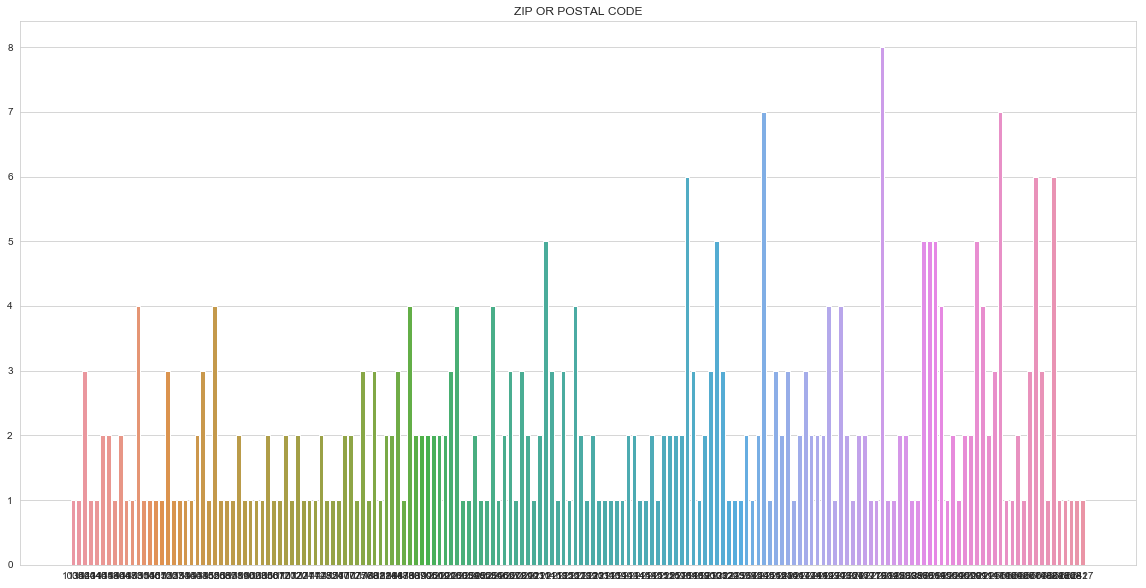

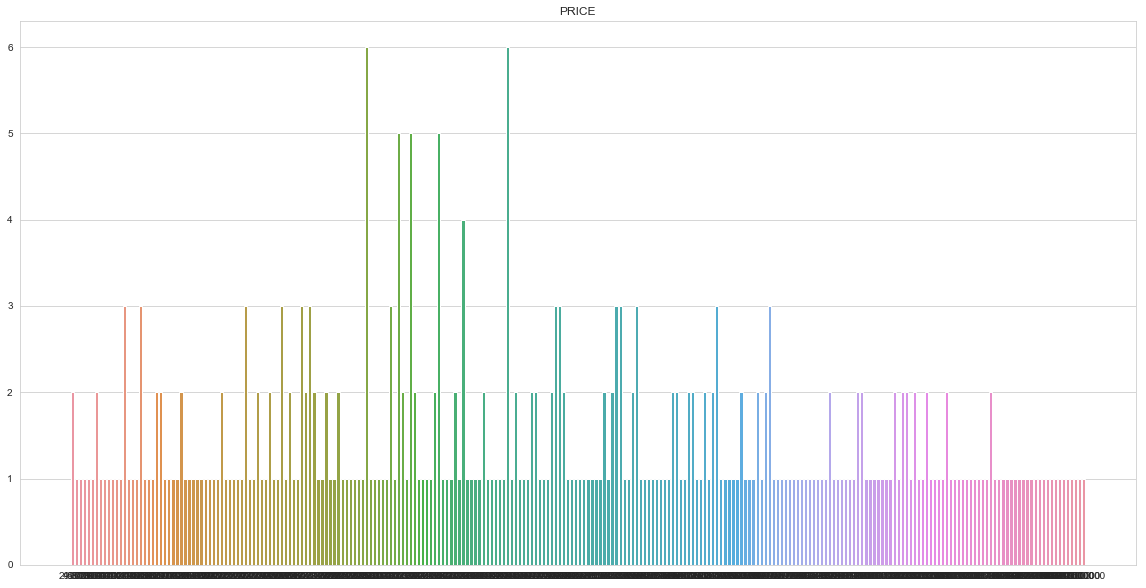

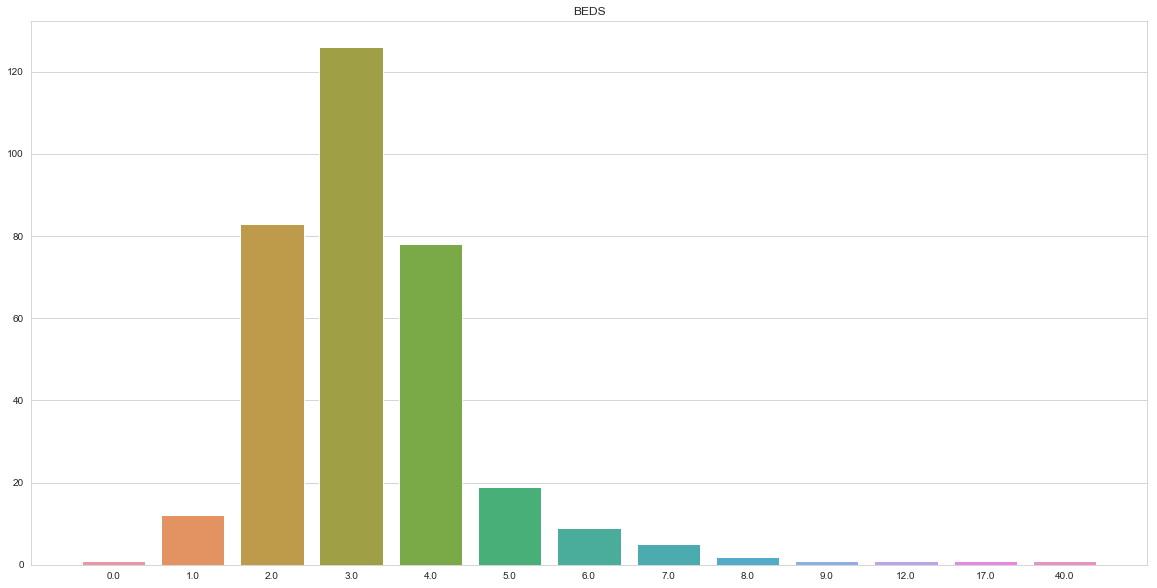

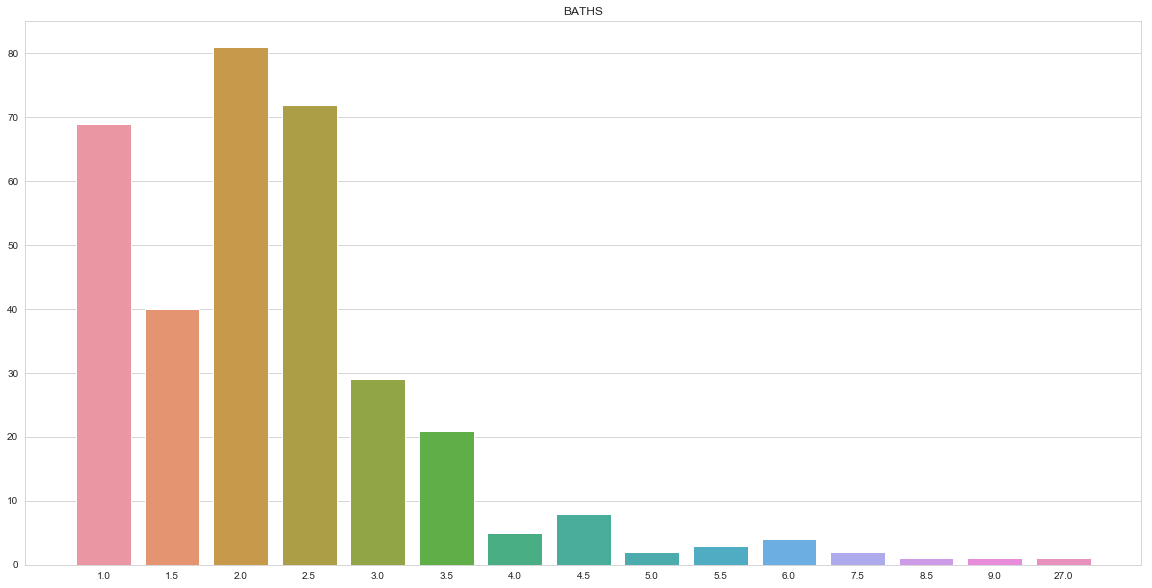

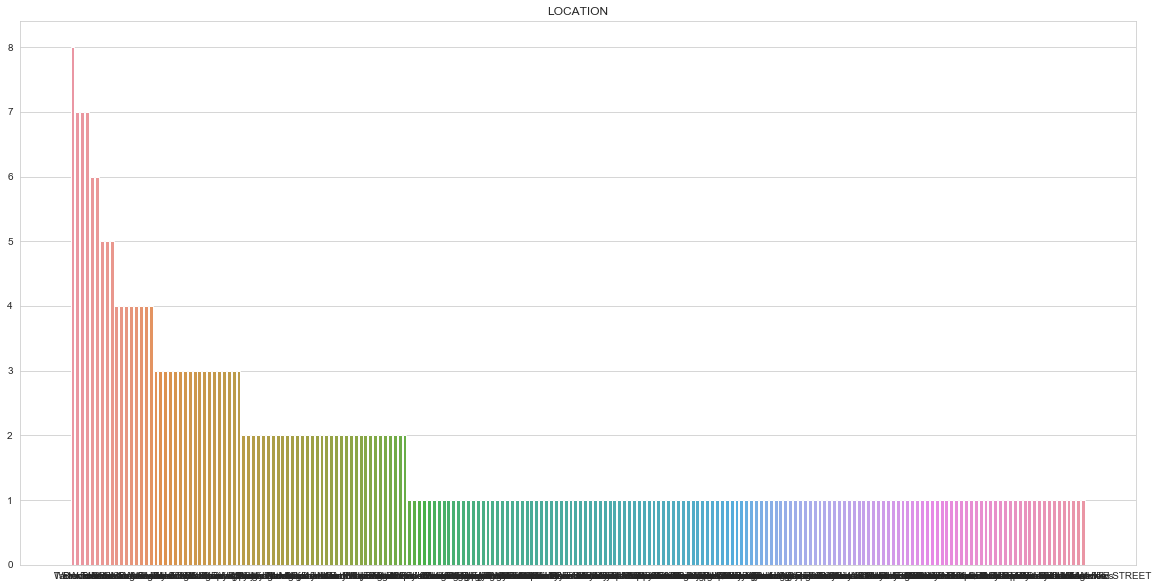

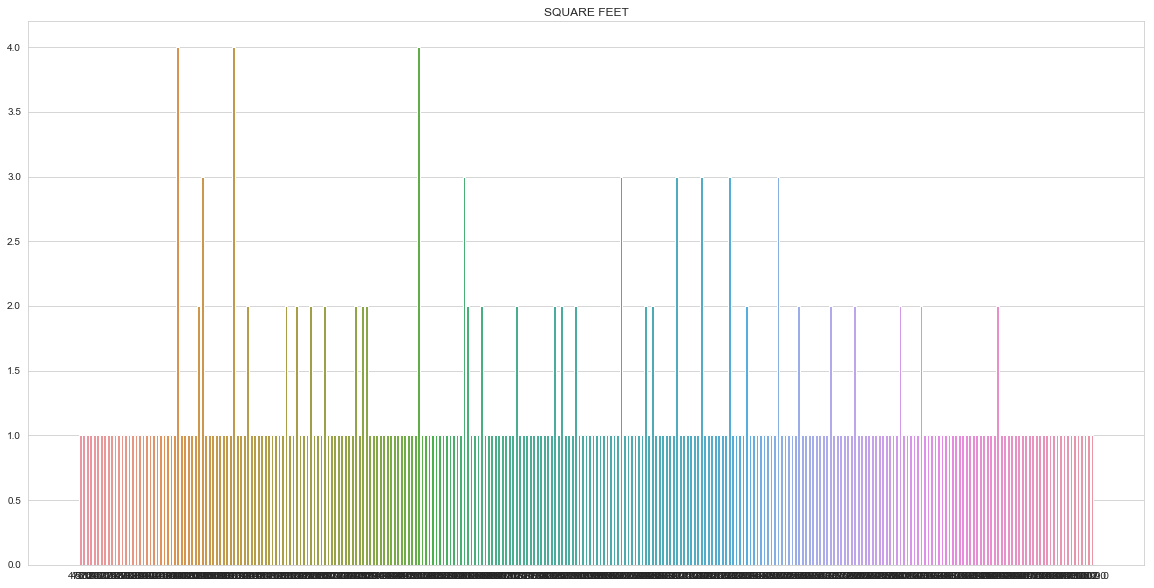

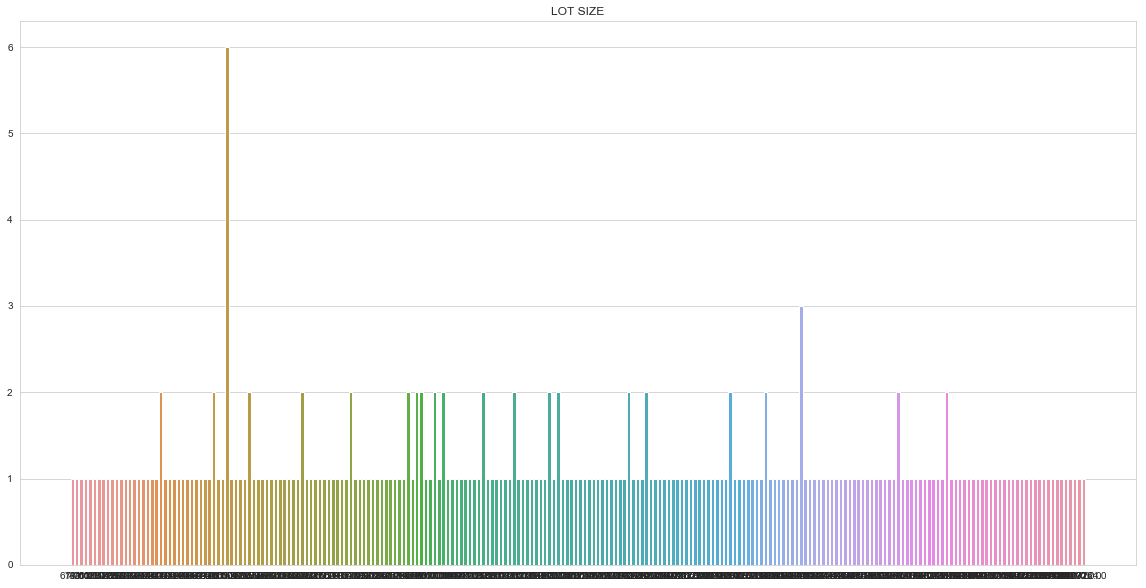

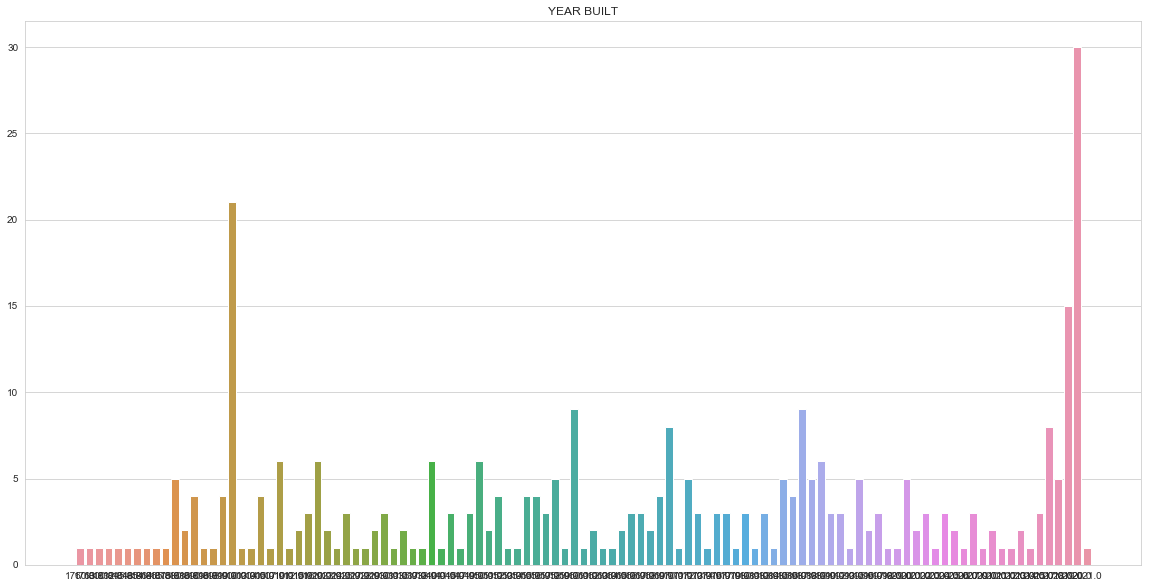

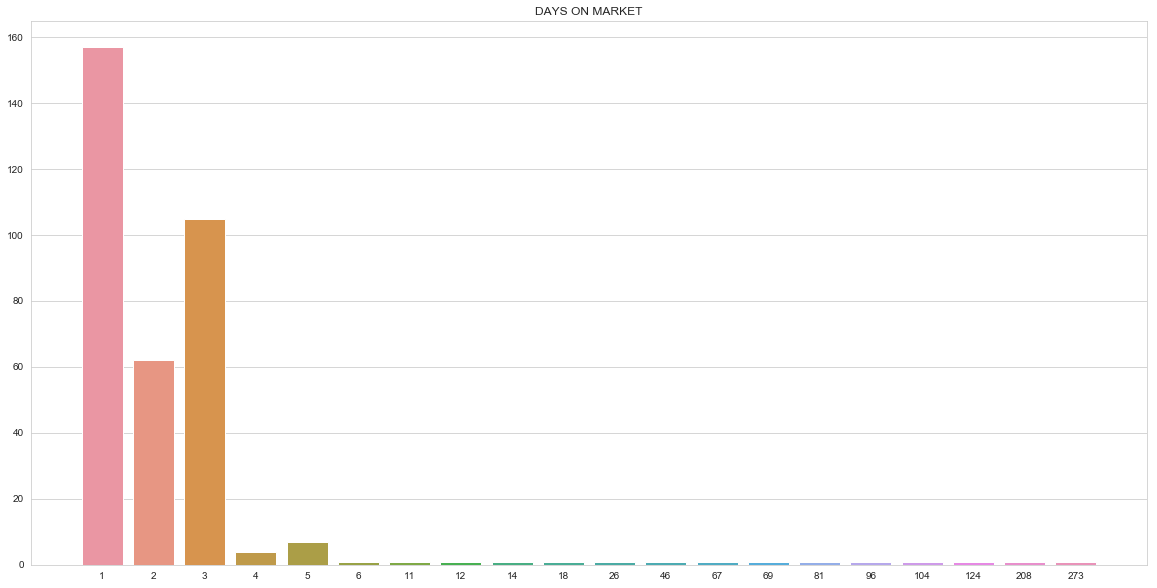

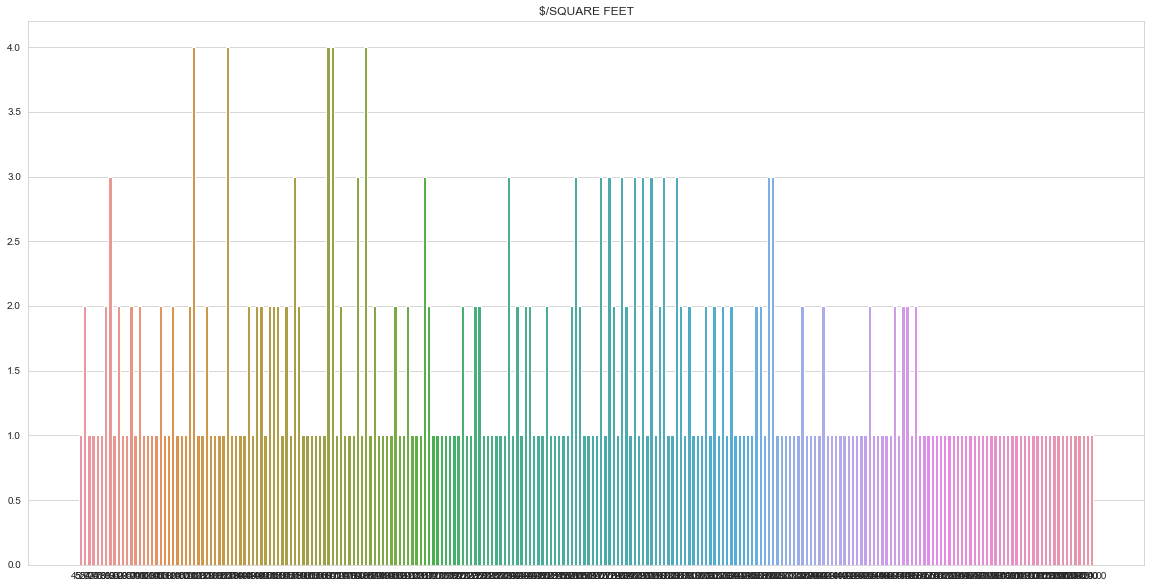

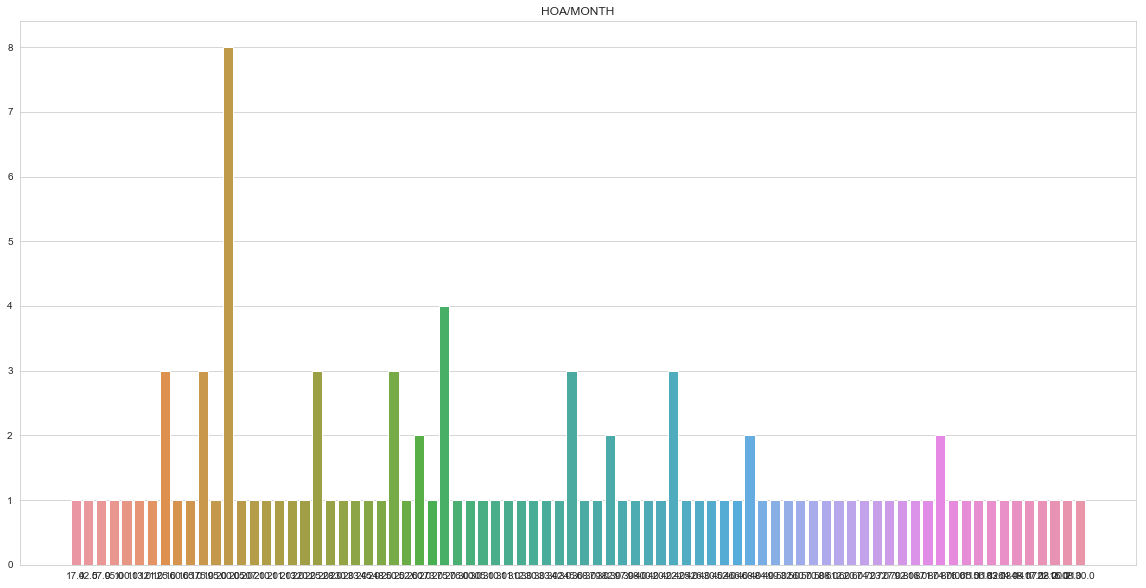

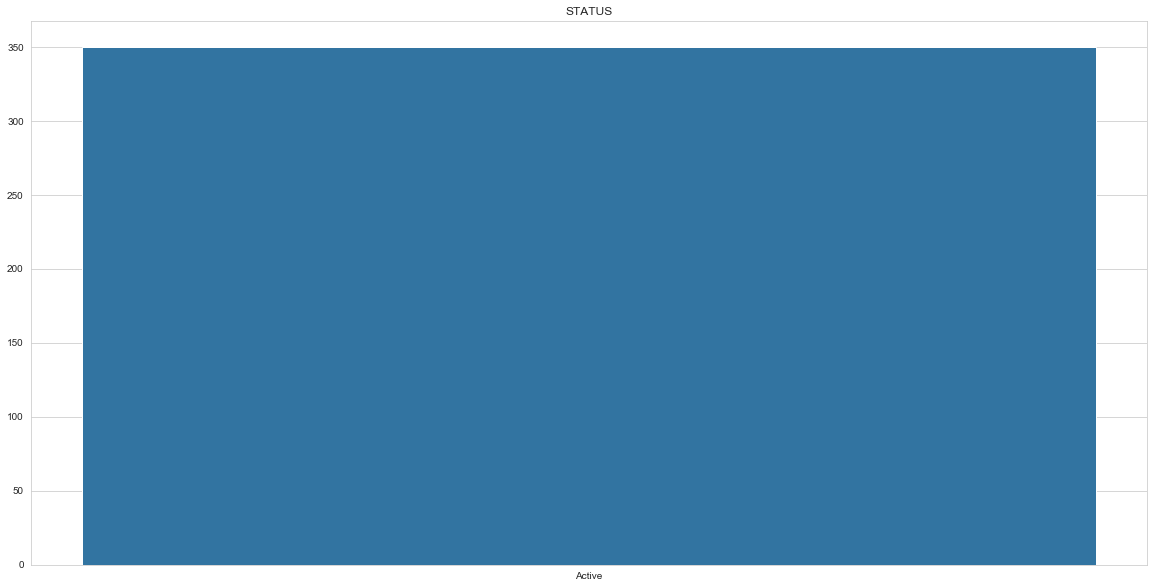

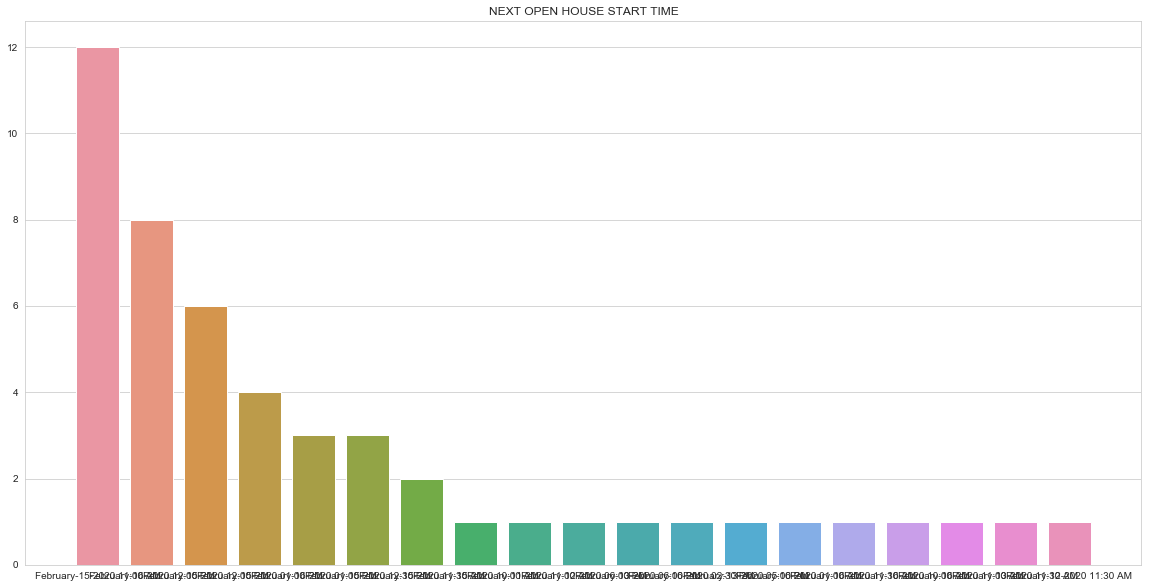

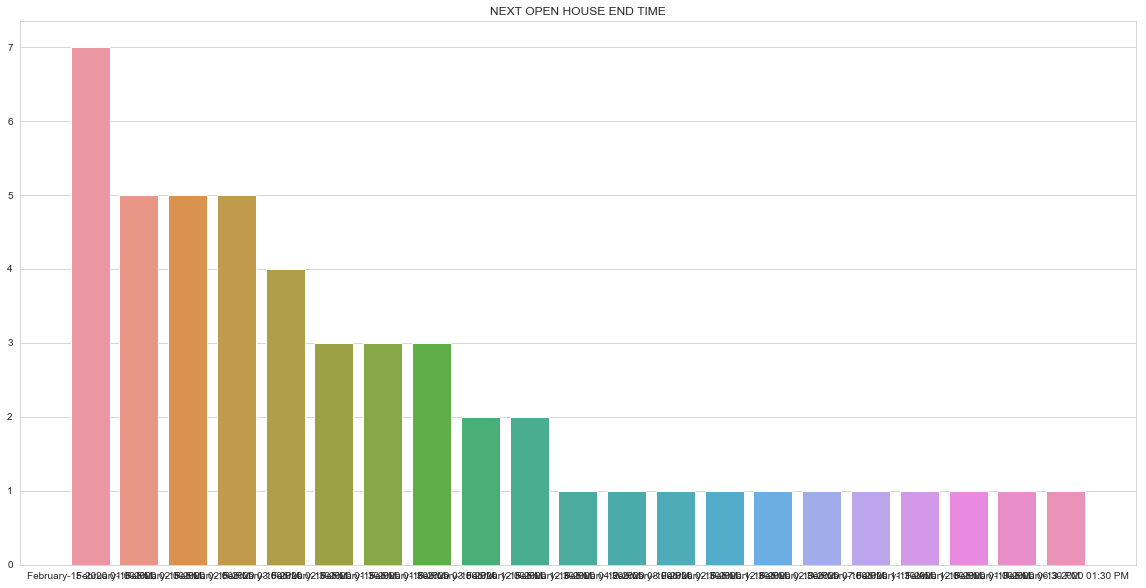

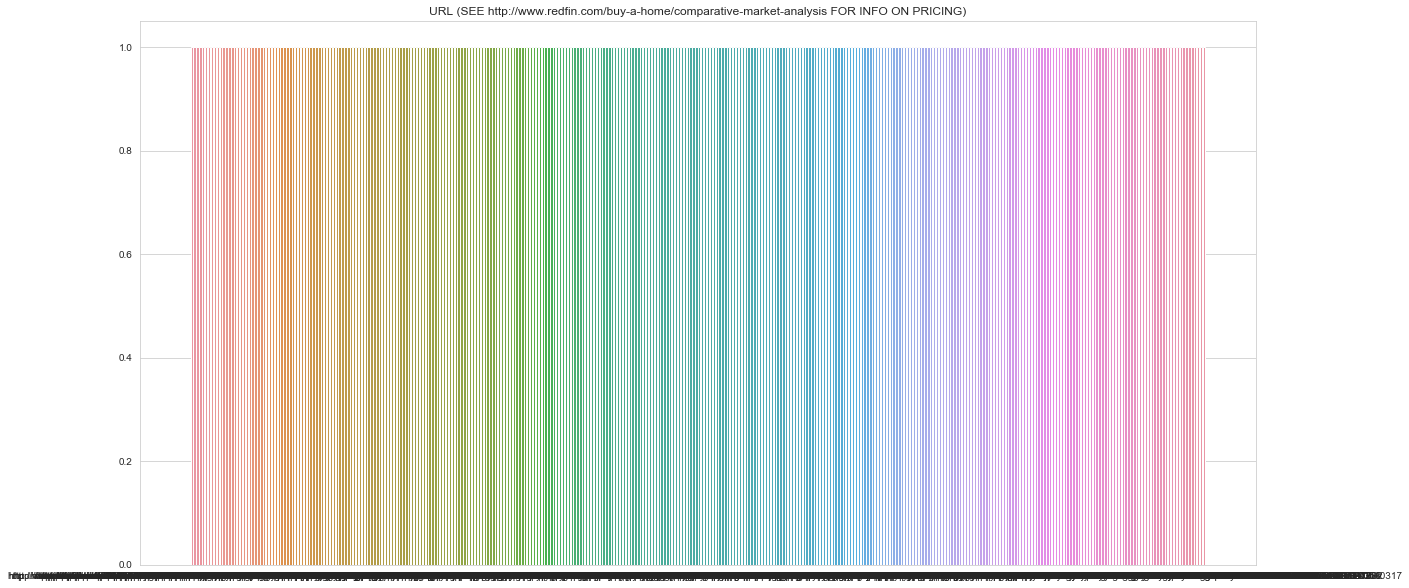

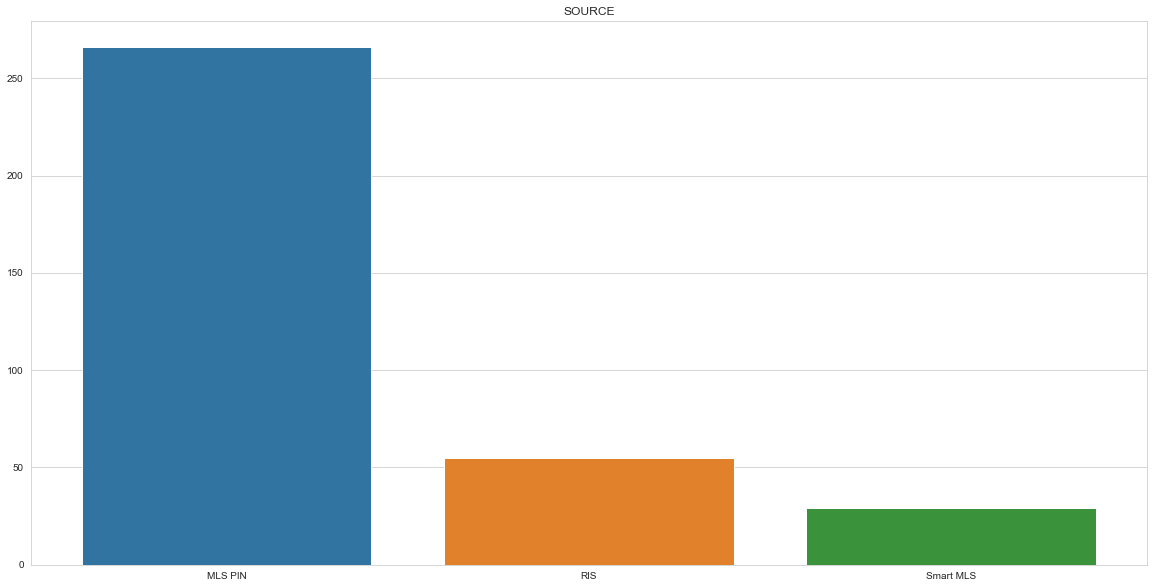

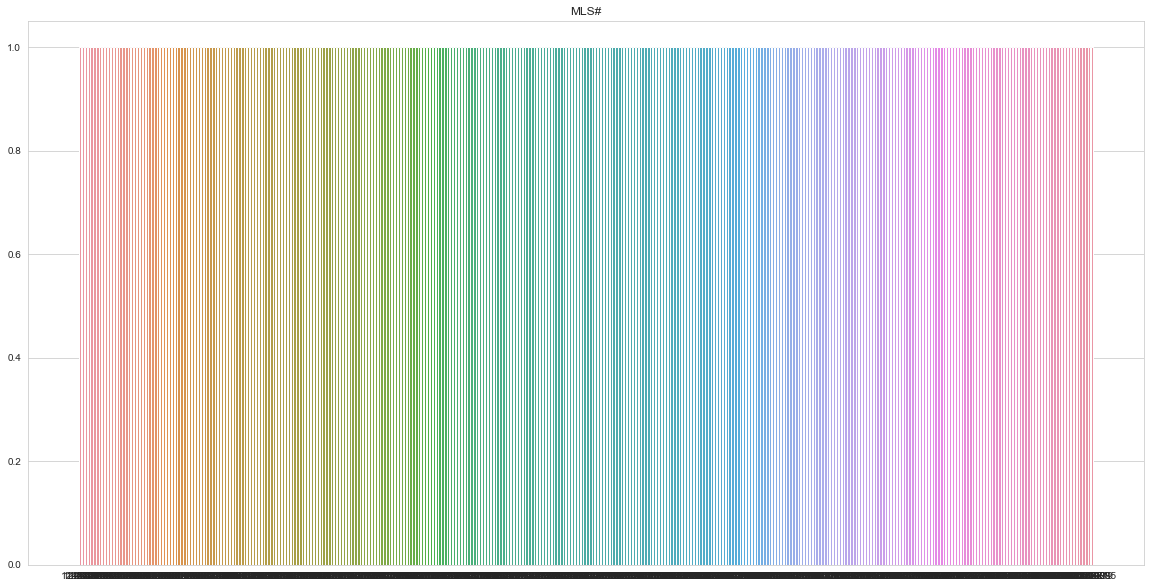

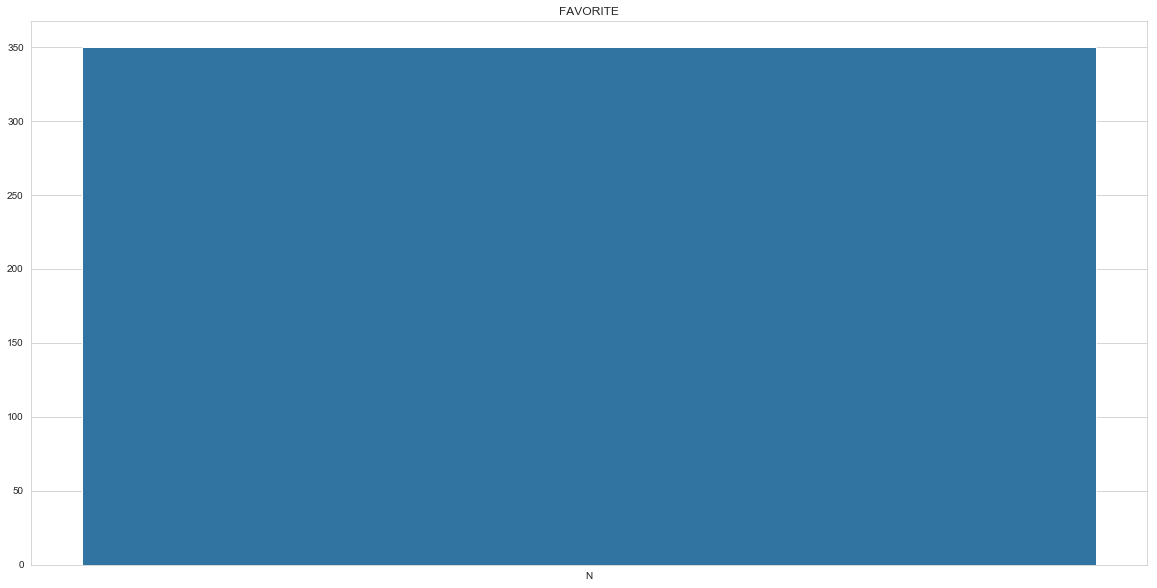

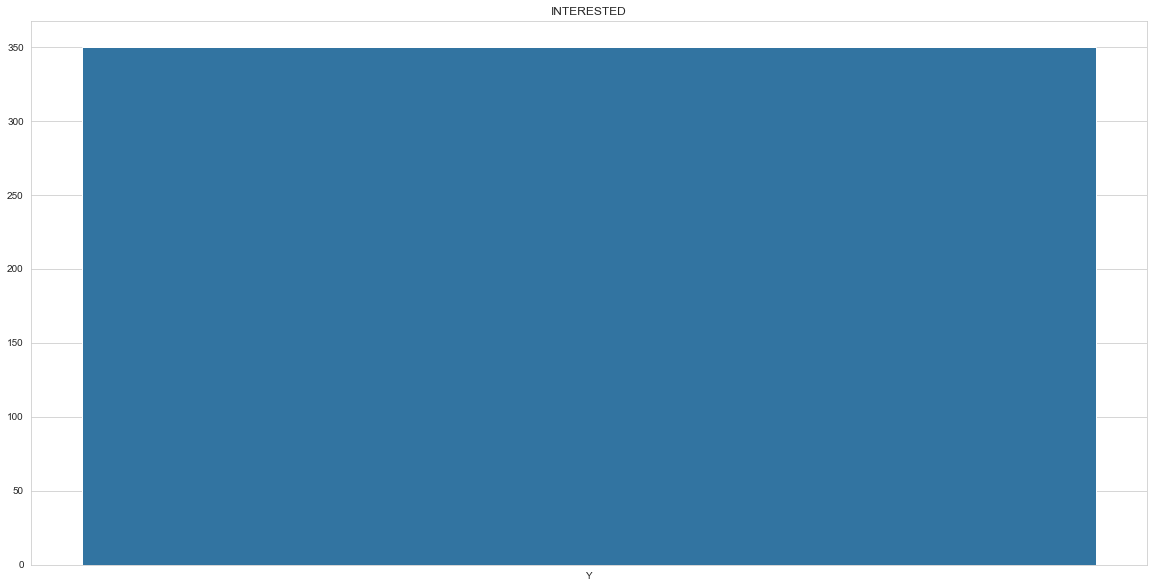

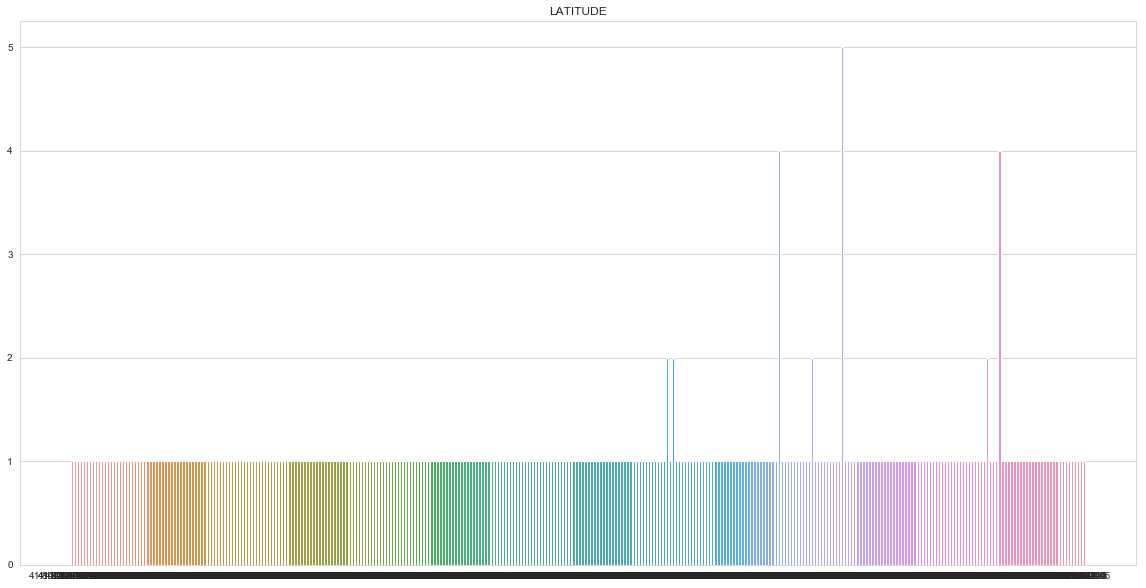

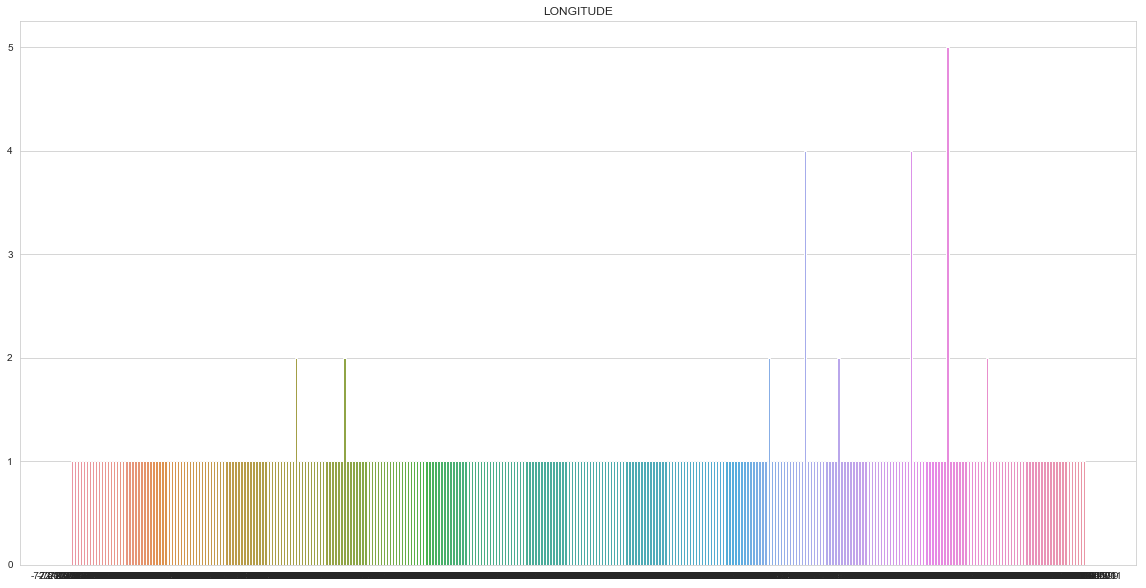

In [428]:
# look at the value distributions of the columns
for col in df.columns:
    d = df[col].value_counts()
    plt.figure(figsize=(20, 10))
    sns.barplot(x=d.keys(), y=d.values)
    plt.title(d.name)
    plt.plot()

### Drop some columns

In [429]:
# based on the distributions above, we can safely drop the following columns:
# INTERESTED, FAVORITE, MLS#, URL, STATUS, SALE TYPE, SOURCE
df = df.drop(['INTERESTED', 'FAVORITE', 'MLS#', 'STATUS', 'SALE TYPE', 'SOURCE',
              'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'], axis=1)
df.shape

(350, 19)

In [430]:
# based on our own knowledge, we can assume the open house information is useless so we can drop the following columns:
# NEXT OPEN HOUSE START TIME, NEXT OPEN HOUSE END TIME
df = df.drop(['NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME'], axis=1)
df.shape

(350, 17)

### Only look at MA listings

In [431]:
# drop all tuples that are not in MA
df = df[df['STATE OR PROVINCE'] == 'MA']
df.shape

(265, 17)

### If there is no HOA fee, the value should be 0/month, not NAN

In [432]:
df['HOA/MONTH'].fillna(0, inplace=True)
df.shape

(265, 17)

In [433]:
df.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Condo/Co-op,650 Columbia Rd #1,Boston,MA,2125,445000,3.0,1.0,Dorchester's Uphams Corner,1297.0,NaN,1907.0,3,343.0,200.0,42.318819,-71.063719
1,Condo/Co-op,125 Hart St Unit 3B,Taunton,MA,2780,329900,3.0,1.5,Taunton,1600.0,NaN,2018.0,4,206.0,248.0,41.884280,-71.068718
2,Single Family Residential,5 Federal St,Wilmington,MA,1887,599900,3.0,2.5,Wilmington,1964.0,17000.0,1960.0,4,305.0,0.0,42.561642,-71.158150
3,Single Family Residential,10 Greenhouse Way,Randolph,MA,2368,589000,4.0,3.5,Randolph,2969.0,18416.0,2002.0,4,198.0,0.0,42.169828,-71.067535
4,Single Family Residential,22 Temple St,Reading,MA,1867,759900,3.0,2.5,Reading,2470.0,7378.0,1916.0,4,308.0,0.0,42.522059,-71.113402


### Where else do we have missing data...

In [434]:
# see what other NAN are there
df[df.isnull().any(axis=1)]

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Condo/Co-op,650 Columbia Rd #1,Boston,MA,2125,445000,3.0,1.0,Dorchester's Uphams Corner,1297.0,NaN,1907.0,3,343.0,200.0,42.318819,-71.063719
1,Condo/Co-op,125 Hart St Unit 3B,Taunton,MA,2780,329900,3.0,1.5,Taunton,1600.0,NaN,2018.0,4,206.0,248.0,41.884280,-71.068718
8,Condo/Co-op,7 Church St #3,Somerville,MA,2143,599000,2.0,1.0,Somerville,927.0,NaN,1900.0,5,646.0,195.0,42.380742,-71.100798
10,Townhouse,21 Hall St #1,Waltham,MA,2453,749900,3.0,2.5,Waltham,2208.0,NaN,2015.0,5,340.0,200.0,42.370363,-71.234998
19,Condo/Co-op,999 Hancock St #308,Quincy,MA,2169,429900,1.0,1.0,Quincy Center,749.0,NaN,2017.0,67,574.0,233.0,42.257589,-71.008694
24,Townhouse,22 Beacon St #22,Shrewsbury,MA,1545,570000,4.0,2.5,Shrewsbury,2395.0,NaN,2017.0,124,238.0,0.0,42.281417,-71.732153
33,Townhouse,114 Commonwealth Ave #3,Boston,MA,2116,1995000,2.0,2.0,Back Bay,1538.0,NaN,1880.0,1,1297.0,420.0,42.351849,-71.076527
42,Condo/Co-op,31 Church Grn #102,Taunton,MA,2780,179900,1.0,1.0,Taunton,782.0,NaN,1985.0,1,230.0,333.0,41.902633,-71.087188
46,Single Family Residential,167 S Franklin St,Holbrook,MA,2343,229900,3.0,1.0,Holbrook,1528.0,5400.0,NaN,1,150.0,0.0,42.150152,-71.008273
50,Condo/Co-op,35 Granite St #2,Cambridge,MA,2139,505000,1.0,1.0,Cambridgeport,497.0,NaN,1886.0,1,1016.0,125.0,42.356386,-71.112282


### Collect all valid (square feet, lot size) tuples

In [435]:
sq_fts = []
lot_sizes = []
for i, row in df.iterrows():
    if row['LOT SIZE'] and row['SQUARE FEET']:
        sq_fts.append(row['SQUARE FEET'])
        lot_sizes.append(row['LOT SIZE'])

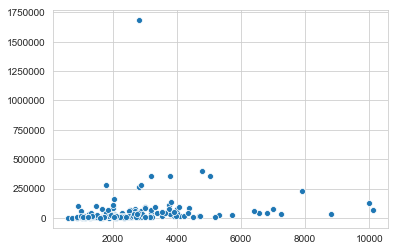

In [436]:
# given valid square foot, lot size tuples, we can interpolate one from the other
sns.scatterplot(sq_fts, lot_sizes)

In [437]:
# There appears to be an outlier
df[df['LOT SIZE'] > 1000000]

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
35,Townhouse,51 Steeple Vw #51,Sturbridge,MA,1566,294900,2.0,2.5,Sturbridge,2816.0,1682722.0,1996.0,1,105.0,466.0,42.108036,-72.085489


### The property above has a square footage of 2816 with a listed lot size of 1682722. This seems like a typo where the decimal point is in the wrong place but we will remove it

In [438]:
df.shape

(265, 17)

In [439]:
# drop the outlier
clean_df = df[~(df['LOT SIZE'] > 1000000)].copy()
clean_df.shape

(264, 17)

### Use a linear regression to interpolate square foot from lot size and vice versa

In [440]:
regression_df = clean_df[~(clean_df['SQUARE FEET'].isnull()) & ~(clean_df['LOT SIZE'].isnull())]
regression_df.shape

(179, 17)

179
179


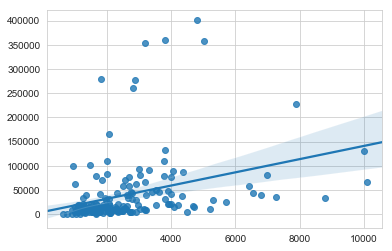

In [441]:
sq_fts = []
lot_sizes = []
for i, row in regression_df.iterrows():
    if row['LOT SIZE'] and row['SQUARE FEET'] and row['SQUARE FEET']:

        sq_fts.append(row['SQUARE FEET'])
        lot_sizes.append(row['LOT SIZE'])

print(len(sq_fts))
print(len(lot_sizes))
x = np.array(sq_fts)
y = np.array(lot_sizes)
        
sns.regplot(sq_fts, lot_sizes)

In [442]:
X = x.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [443]:
reg.coef_

array([13.63062156])

In [444]:
reg.intercept_

4561.771654335142

### Helper functions to get lot size from square feet and vice versa

In [445]:
# y = 4561.77 + 13.63*x 
# where y = lot size and x = square feet
def x_to_y(x):
    return reg.intercept_ + reg.coef_ * x
    
def y_to_x(y):
    return (-4561.77 / 13.63) + (float(y) / 13.63)

In [446]:
clean_df.shape

(264, 17)

In [447]:
filled_df = clean_df.copy()

### FIll in missing lot sizes and square feet

In [448]:
# start filling in the blank lot sizes
filled_df['LOT SIZE'] = clean_df['LOT SIZE'].fillna(clean_df['SQUARE FEET'].apply(lambda x: x_to_y(x)[0]))
filled_df[filled_df['LOT SIZE'].isnull()]

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
281,Multi-Family (5+ Unit),1 Schrepel Pl,Boston,MA,2127,15000000,40.0,27.0,Boston,NaN,NaN,NaN,3,NaN,0.0,42.336747,-71.037821


In [449]:
# fill in blanks from square feet with lot size
filled_df['SQUARE FEET'] = filled_df['SQUARE FEET'].fillna(clean_df['LOT SIZE'].apply(lambda y: y_to_x(y)))
filled_df[filled_df['SQUARE FEET'].isnull()]

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
281,Multi-Family (5+ Unit),1 Schrepel Pl,Boston,MA,2127,15000000,40.0,27.0,Boston,NaN,NaN,NaN,3,NaN,0.0,42.336747,-71.037821


### Recalculate the dollar/sq ft with the new interpolated sq foot values

In [450]:
filled_df['$/SQUARE FEET'].fillna(filled_df['PRICE'] / filled_df['SQUARE FEET'], inplace=True)
filled_df['$/SQUARE FEET'].isnull().sum()

1

In [451]:
# remove entry with no square foot or lot size
filled_df = filled_df[~(filled_df['LOT SIZE'].isnull()) & ~(filled_df['SQUARE FEET'].isnull())]
filled_df.shape

(263, 17)

In [452]:
(filled_df['SQUARE FEET'].isnull() & filled_df['LOT SIZE']).isnull().sum()

0

In [453]:
filled_df.shape

(263, 17)

### Bin  the PRICE column into categories every 50,000

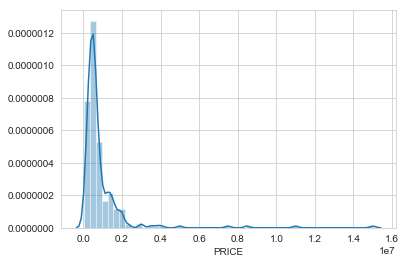

In [454]:
sns.distplot(df['PRICE'])

In [455]:
filled_df.shape

(263, 17)

In [456]:
filled_df['PRICE'].describe()

count    2.630000e+02
mean     8.394992e+05
std      1.107140e+06
min      4.990000e+04
25%      3.499000e+05
50%      5.499000e+05
75%      8.844000e+05
max      1.100000e+07
Name: PRICE, dtype: float64

In [465]:
bins = [x*50000 for x in range(0, 222)]
labels = list(range(0, 221))
print(bins, labels)
print(len(bins), len(labels))

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1050000, 1100000, 1150000, 1200000, 1250000, 1300000, 1350000, 1400000, 1450000, 1500000, 1550000, 1600000, 1650000, 1700000, 1750000, 1800000, 1850000, 1900000, 1950000, 2000000, 2050000, 2100000, 2150000, 2200000, 2250000, 2300000, 2350000, 2400000, 2450000, 2500000, 2550000, 2600000, 2650000, 2700000, 2750000, 2800000, 2850000, 2900000, 2950000, 3000000, 3050000, 3100000, 3150000, 3200000, 3250000, 3300000, 3350000, 3400000, 3450000, 3500000, 3550000, 3600000, 3650000, 3700000, 3750000, 3800000, 3850000, 3900000, 3950000, 4000000, 4050000, 4100000, 4150000, 4200000, 4250000, 4300000, 4350000, 4400000, 4450000, 4500000, 4550000, 4600000, 4650000, 4700000, 4750000, 4800000, 4850000, 4900000, 4950000, 5000000, 5050000, 5100000, 5150000, 5200000, 5250000, 5300000, 5350000, 5400000, 5450000, 5500000, 5550000, 5600000, 5650000,

In [473]:
filled_df['PRICE_BIN'] = pd.cut(filled_df['PRICE'], bins, labels=labels)
filled_df['PRICE_BIN_RANGE'] = pd.cut(filled_df['PRICE'], bins)
filled_df.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PRICE_BIN,PRICE_BIN_ALT,PRICE_BIN_RANGE
0,Condo/Co-op,650 Columbia Rd #1,Boston,MA,2125,445000,3.0,1.0,Dorchester's Uphams Corner,1297.0,22240.687813,1907.0,3,343.0,200.0,42.318819,-71.063719,8,3,"(400000, 450000]"
1,Condo/Co-op,125 Hart St Unit 3B,Taunton,MA,2780,329900,3.0,1.5,Taunton,1600.0,26370.766144,2018.0,4,206.0,248.0,41.884280,-71.068718,6,1,"(300000, 350000]"
2,Single Family Residential,5 Federal St,Wilmington,MA,1887,599900,3.0,2.5,Wilmington,1964.0,17000.000000,1960.0,4,305.0,0.0,42.561642,-71.158150,11,5,"(550000, 600000]"
3,Single Family Residential,10 Greenhouse Way,Randolph,MA,2368,589000,4.0,3.5,Randolph,2969.0,18416.000000,2002.0,4,198.0,0.0,42.169828,-71.067535,11,5,"(550000, 600000]"
4,Single Family Residential,22 Temple St,Reading,MA,1867,759900,3.0,2.5,Reading,2470.0,7378.000000,1916.0,4,308.0,0.0,42.522059,-71.113402,15,6,"(750000, 800000]"


In [474]:
q_labels = list(range(0, 10))
filled_df['PRICE_BIN_ALT'] = pd.qcut(filled_df['PRICE'], q=10, labels=q_labels)
filled_df['PRICE_BIN_ALT_RANGE'] = pd.qcut(filled_df['PRICE'], q=10)
filled_df.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PRICE_BIN,PRICE_BIN_ALT,PRICE_BIN_RANGE,PRICE_BIN_ALT_RANGE
0,Condo/Co-op,650 Columbia Rd #1,Boston,MA,2125,445000,3.0,1.0,Dorchester's Uphams Corner,1297.0,...,1907.0,3,343.0,200.0,42.318819,-71.063719,8,3,"(400000, 450000]","(417100.0, 486600.0]"
1,Condo/Co-op,125 Hart St Unit 3B,Taunton,MA,2780,329900,3.0,1.5,Taunton,1600.0,...,2018.0,4,206.0,248.0,41.884280,-71.068718,6,1,"(300000, 350000]","(264960.0, 329900.0]"
2,Single Family Residential,5 Federal St,Wilmington,MA,1887,599900,3.0,2.5,Wilmington,1964.0,...,1960.0,4,305.0,0.0,42.561642,-71.158150,11,5,"(550000, 600000]","(549900.0, 639900.0]"
3,Single Family Residential,10 Greenhouse Way,Randolph,MA,2368,589000,4.0,3.5,Randolph,2969.0,...,2002.0,4,198.0,0.0,42.169828,-71.067535,11,5,"(550000, 600000]","(549900.0, 639900.0]"
4,Single Family Residential,22 Temple St,Reading,MA,1867,759900,3.0,2.5,Reading,2470.0,...,1916.0,4,308.0,0.0,42.522059,-71.113402,15,6,"(750000, 800000]","(639900.0, 791520.0]"


### Check the year built, if NaN, fill with the mean of the column

In [475]:
# check the year build
filled_df['YEAR BUILT'].isnull().sum()

0

In [476]:
filled_df['YEAR BUILT'].fillna(np.floor(np.mean(filled_df['YEAR BUILT'])), inplace=True)
filled_df['YEAR BUILT'].isnull().sum()

0

### drop any listings without bed/bath info, these are from vacant lots most likely

In [477]:
filled_df.dropna(axis=0, how='any', subset=['BEDS', 'BATHS'], inplace=True)
filled_df.shape

(257, 21)

### Make sure all prices are binned

In [478]:
filled_df['PRICE_BIN'].isnull().sum()

0

### Weka does not like the single quote character, we shall remove it

In [482]:
filled_df['LOCATION'] = filled_df['LOCATION'].str.replace("'", "")

In [483]:
filled_df.to_csv("data/cleaned_data_ready_for_weka.csv", index=None)

## Weka data load and processing

1. Load data
2. Convert PRICE_BIN_ALT to nominal attribute
3. Remove dollar/sq feet attribute
4. Remove PRICE_BIN, PRICE_BIN_RANGE, PRICE_BIN_ALT_RANGE attributes
5. Convert ZIP OR POSTAL CODE to Nominal attribute

### Attribute selection:

1. OneRAttributeEval + Ranker + 10-fold CV
2. ClassifierAttributeEval + Ranker + 10-fold CV
3. InfoGainAttributeEval + Ranker + 10-fold CV
4. CfsSubsetEval + GreedyStepWise + 10-fold CV
5. From workspace, attributes 1, 5, 6, 7, 9, 10

### Classifier Models to assess
1. Random Forest - JA
2. OneR - JA
3. Naive Bayes - JA
4. Logistic regression - MZ
5. MLP - MZ